In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
gen = np.random.default_rng()

ModuleNotFoundError: No module named 'pandas'

In [31]:
A = [1, 2, 3]
B = [3, 1, 2]
categories = ["chores", "finances", "activities"]

subgame_payoffs = np.array([[
    [[0, 0],        [A[i], -B[i]]],
    [[-A[i], B[i]], [1.5, 1.5]]]
    for i in range(3)])


In [ ]:
def insist(x):
    return [0, 0, 0]


def compromise(x):
    return [1, 1, 1]


def random(x):
    return gen.integers(2, size=3)


def titfortat(x):
    if x[1] == []:
        return [1, 1, 1]
    return x[1][-1]


def grim(x):
    if x[1] == []:
        return [1, 1, 1]
    return np.minimum(x[1][-1], x[0][-1])


def gradual_forgiving(x, n=5):
    if x[1] == []:
        return [1, 1, 1]

    return np.min(x[1][-n:], axis = 0)

strategies = [insist, compromise, random, titfortat, gradual_forgiving, random]

In [33]:
def game(strategy_A, strategy_B, N):
    choices = [[], []]
    for _ in range(N):
        a = strategy_A(choices)
        b = strategy_B(choices[::-1])
        choices[0].append(a)
        choices[1].append(b)
    return np.transpose(np.array(choices))

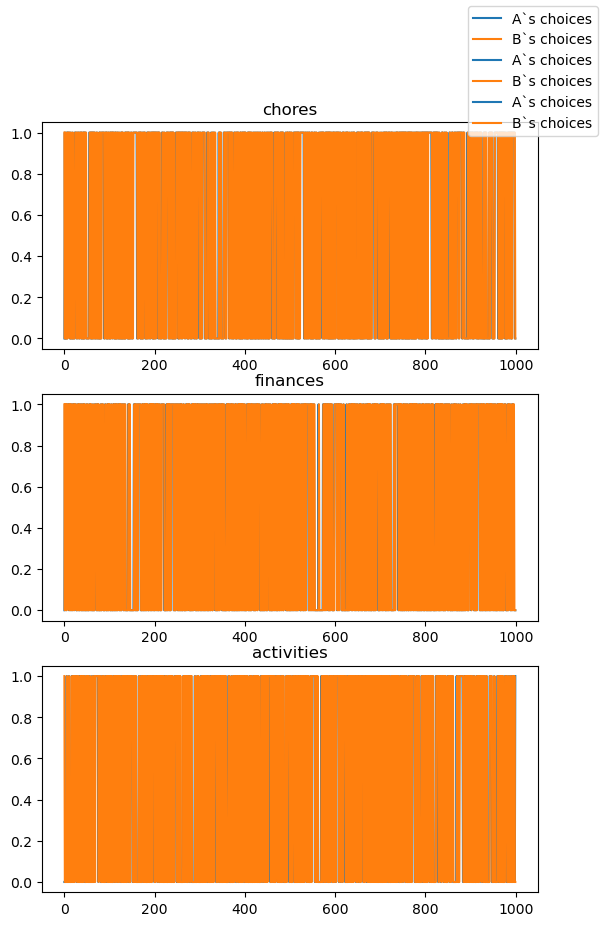

In [ ]:
choices = game(random,titfortat,N=1000)
fig, ax = plt.subplots(3)
fig.set_figheight(10)

for i in range(3):
    ax[i].plot(choices[i], label=[f'A`s choices', f'B`s choices'])
    ax[i].set_title(categories[i])
fig.legend()
plt.show()

In [48]:
def mean_payoffs(strategy_A, strategy_B, N=10000):
    choices = game(strategy_A,strategy_B, N)
    ret = np.zeros(2)
    for i in range(3): # subgame 
        for j in range(len(choices[0])): # iteration
            ret += subgame_payoffs[i, choices[i,j, 0], choices[i,j,1]]
    return ret / N

In [ ]:
N = 10000

payoffs = []
for i in range(len(strategies)):
    payoffs.append([])
    for j in range(len(strategies)):
        payoffs[-1].append(mean_payoffs(strategies[i], strategies[j], N = N))

In [ ]:
fo

In [12]:
def stochastic(x, p):
    if x[1] == [] or x[0] == []:
        return [1,1,1]
    p = np.array(p)
    prob = p[2 * x[0][-1] + x[1][-1]]

    return [gen.choice(a=2, p = [1 - prob[i], prob[i]]) for i in range(3)]

In [ ]:
p = [0,1,0,1] # p_dd, p_dc, p_cd, p_cc
stoch = lambda x:stochastic(x,p)